In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

# Organizing data

In [2]:
#changong data types to datetime format for users table

users_to_clean = pd.read_csv('./data/users.csv')
users_to_clean['Modified'] = pd.to_datetime(users_to_clean.modifiedAt, infer_datetime_format=True)  
users_to_clean['Departure'] = pd.to_datetime(users_to_clean.requestedDeparture, infer_datetime_format=True)
users = users_to_clean.drop(columns = ['requestedDeparture', 'modifiedAt', 'Unnamed: 0'])
users.head()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
0,350,59.5,170,550,True,22,2018-04-30 15:08:54+00:00,2018-05-01 00:17:49+00:00
1,400,8.0,20,60,True,61,2018-05-07 14:38:32+00:00,2018-05-07 15:38:18+00:00
2,400,8.0,20,648,True,61,2018-05-07 15:40:44+00:00,2018-05-08 01:26:18+00:00
3,400,28.0,70,648,True,61,2018-05-07 15:41:04+00:00,2018-05-08 01:26:18+00:00
4,350,17.5,50,546,True,22,2018-05-11 15:18:23+00:00,2018-05-12 00:23:01+00:00


In [3]:
#changing data types to datetime format for users table

charging_to_clean = pd.read_csv('./data/charging.csv')
charging_to_clean['ConnectionTime'] = pd.to_datetime(charging_to_clean.connectionTime, infer_datetime_format=True) 
charging_to_clean['DisconnectTime'] = pd.to_datetime(charging_to_clean.disconnectTime, infer_datetime_format=True) 
charging_to_clean['DoneCharging'] = pd.to_datetime(charging_to_clean.doneChargingTime, infer_datetime_format=True) 

charging = charging_to_clean.drop(columns = ['connectionTime', 'disconnectTime', 'doneChargingTime', 'Unnamed: 0'])
charging.head()

,_id,clusterID,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,ConnectionTime,DisconnectTime,DoneCharging
0,5bc90cb9f9af8b0d7fe77cd2,39,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,2018-04-25 11:08:04+00:00,2018-04-25 13:20:10+00:00,2018-04-25 13:21:10+00:00
1,5bc90cb9f9af8b0d7fe77cd3,39,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00
2,5bc90cb9f9af8b0d7fe77cd4,39,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00
3,5bc90cb9f9af8b0d7fe77cd5,39,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00
4,5bc90cb9f9af8b0d7fe77cd6,39,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00


In [40]:
charging.describe()

,clusterID,kWhDelivered,siteID,userID
count,28042.0,28042.000000,28042.0,13275.000000
mean,39.0,8.898859,2.0,1093.202109
std,0.0,8.088413,0.0,871.109487
min,39.0,0.501000,2.0,1.000000
25%,39.0,3.422000,2.0,567.000000
50%,39.0,6.695000,2.0,869.000000
75%,39.0,12.675000,2.0,1222.000000
max,39.0,75.528000,2.0,6952.000000


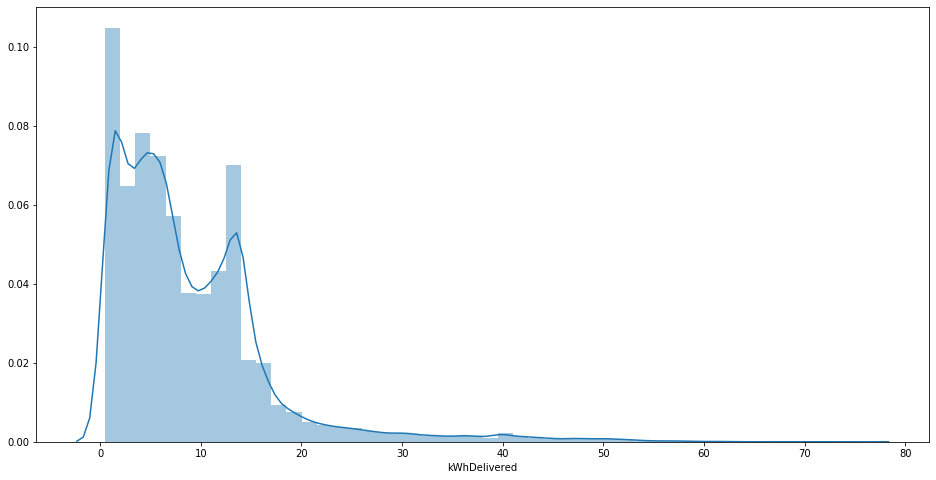

In [42]:
ax, fig = plt.subplots(figsize = (16,8))
ax = sns.distplot(charging.kWhDelivered)

## time to charge

In [110]:
time_to_charge = charging.DoneCharging - charging.ConnectionTime
time = []
for index, value in time_to_charge.items():
    time.append(value.seconds)

time = [x / 60 for x in time]

Text(0.5, 0, 'Time to charge, in minutes')

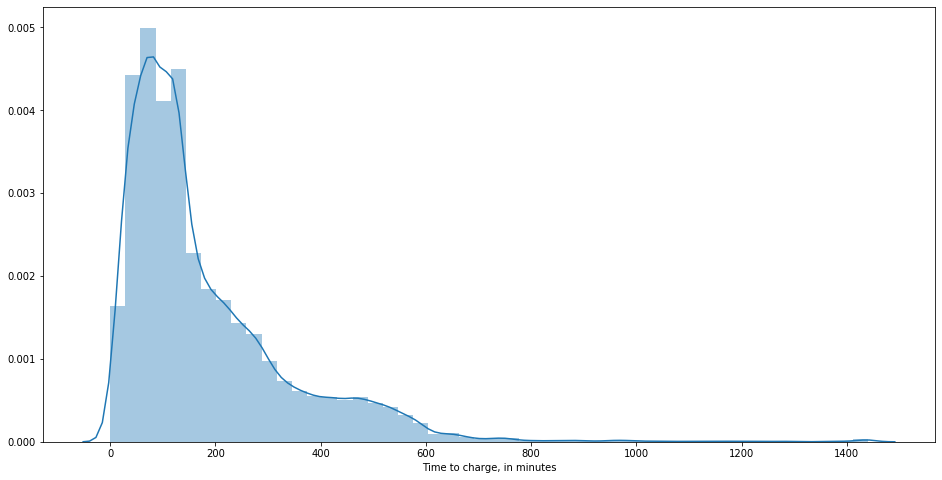

In [107]:
ax, fig = plt.subplots(figsize = (16,8))
ax = sns.distplot(time)
ax.set_xlabel('Time to charge, in minutes')

## choosing charging sessions for Tesla users

In [22]:
#finding userIDs for Tesla cars
msk_tesla_wpm = (users.WhPerMile > 350)
tesla_IDs = users[msk_tesla_wpm].userID.unique()
tesla_IDs

array([  61,   66,   68,   69,   75,  162,    1,  222,  232,  259,  231,
        291,  295,  286,  290,  325,  241,  301,  303,  324,  300,  364,
        272,  316,  289,  484,  160,  513,  489,  569,  564,  593,  627,
        629,  159,  257,  566,  676,  258,  543,  671,  412,  541,  755,
        869,  859,  249, 1001,  712, 1064,  516,  743,  686, 1086, 1090,
       1091, 1092,  850, 1095,  190,  838, 1108, 1111, 1097, 1122, 1087,
        632,  668,  858, 1124,  781,  609, 1093, 1099,  924, 1153, 1120,
       1102, 1154,  567,  945, 1094, 1082,  777,  697, 1161, 1133,  637,
        710,  620,  431, 1135, 1164,  875,  752, 1137, 1007, 1202, 1011,
        744, 1222,  674, 1225, 1238,  774, 1215, 1257,  579, 1123, 1208,
       1272, 1286, 1142, 1021, 1231,  214, 1285, 1316,   65,  669, 1325,
       1327,  297, 1339,  560, 1110, 1359, 1364, 1366, 1367, 1384,  958,
       1408,  423, 1293, 1346, 1453, 1473,  818, 1509, 1526, 1524,  639,
       1546, 1236,  420, 1152, 1616, 1481, 1083, 13

In [24]:
#finding charging sessions for Tesla's userIDs
msk_tesla = charging.userID.isin(tesla_IDs)
tesla_charging = charging[msk_tesla]
tesla_charging.describe()

,clusterID,kWhDelivered,siteID,userID
count,11879.0,11879.000000,11879.0,11879.000000
mean,39.0,10.021086,2.0,1091.457867
std,0.0,8.979298,0.0,871.541824
min,39.0,0.510000,2.0,1.000000
25%,39.0,4.268000,2.0,567.000000
50%,39.0,7.160000,2.0,858.000000
75%,39.0,12.950000,2.0,1202.000000
max,39.0,75.528000,2.0,6623.000000


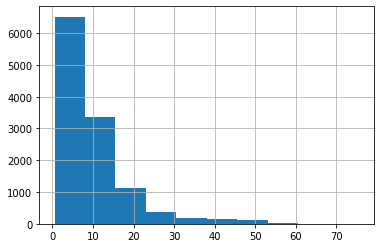

In [36]:
tesla_charging.kWhDelivered.hist()

In [33]:
#finding userIDs for Smart cars
msk_Smart = (users.kWhRequested < 16.5) & (users.WhPerMile < 321)
smart_IDs = users[msk_Smart].userID.unique()
smart_IDs

array([  61,  162,   58,  248,  176,  280,  242,  513,  222,  560,  562,
        593,  216,  159,  556,  234,  559,   68,  754,  171,  781,  303,
        697,  558,  883, 1039,  566,  674, 1001, 1083, 1104,  569,  891,
        516,   66, 1064,   69,  714,  832, 1102,  564,  431, 1214, 1243,
        634, 1263,  667,  818,  243, 1314,  850,  724,  675,  336, 1085,
       1384,  232, 1122, 1458, 1470,  710,  433, 1534,  231,  376, 1752,
       1154, 1564,  444,  629,  515, 1915,  342,  372, 1091,  292,  734,
       2149,  291, 1152, 2404,  915,  563,  609, 1902, 2961, 2950, 2213,
       3143,   67, 3159, 3111, 1864, 1126,  311, 3034,  362, 3271,  335,
       3876,  183, 1957,  420, 3250, 1162,  671, 4701, 4622,  364, 3449,
       6049,  958, 2284, 6638, 1526, 1539])

In [34]:
#finding charging sessions for Smart's userIDs
msk_smart = charging.userID.isin(smart_IDs)
smart_charging = charging[msk_smart]
smart_charging.describe()

,clusterID,kWhDelivered,siteID,userID
count,5896.0,5896.000000,5896.0,5896.000000
mean,39.0,12.186021,2.0,880.721506
std,0.0,9.980328,0.0,738.192719
min,39.0,0.510000,2.0,58.000000
25%,39.0,5.217250,2.0,558.000000
50%,39.0,9.821000,2.0,697.000000
75%,39.0,15.887250,2.0,1091.000000
max,39.0,65.900000,2.0,6638.000000


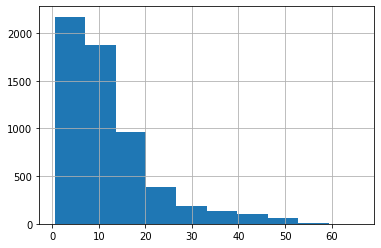

In [35]:
smart_charging.kWhDelivered.hist()